Optimised a step
[1 7] : 4.799999999999098
[2 8] : 4.799999999999098
[3 8] : 3.9999999999992486
[5 1] : 3.199999999999399
[ 6 -1] : 5.599999999998948
[7 3] : 3.199999999999399
Optimised a step
[1 7] : 1.5199999999990799
[2 8] : 1.5199999999990799
[3 8] : 1.1999999999992312
[5 1] : 1.679999999999408
[ 6 -1] : 2.6399999999989543
[7 3] : 1.679999999999408
Optimised a step
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


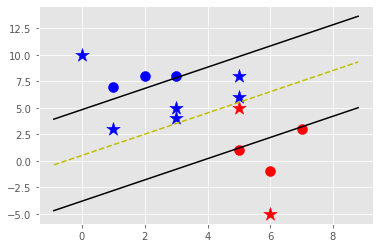

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualisation=True):
        self.visualisation = visualisation
        self.colors = {1:'r', -1:'b'}#"positive" class will be red, "negative" class will be blue
        if self.visualisation:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)

    #could also be called 'train'
    def fit(self, data):
        self.data = data
        #{ ||w||: [w,b]}
        opt_dict = {}

        #these will be applied to the vector w as we step through the the 
        #the magnitude of the resulting vector will be unchanged,
        #however the dot product will produce a different result
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None#just so we don't have to store everything in memory

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      #becomes very expensive:
                      self.max_feature_value * 0.001]

        #extremely expensive
        b_range_multiple = 2
        #the step size for finding b does not need to be as small as the steps for w
        b_multiple = 5

        latest_optimum = self.max_feature_value*10

        #stepping process
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimised = False#becomes true when there are no more steps to take
            
            while not optimised:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple), (self.max_feature_value*b_range_multiple), step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        for yi in self.data:
                            for xi in self.data[yi]:
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                        
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                
                if w[0] < 0:
                    optimised = True
                    print('Optimised a step')
                else:
                    w = w - step#same as w = w - [step, step]
            
            norms = sorted([n for n in opt_dict])#sort dictionary by magnituded from lowest to highest
            opt_choice = opt_dict[norms[0]]

            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2

            for i in self.data:
                for xi in self.data[i]:
                    yi = i
                    print(xi, ':', yi*(np.dot(self.w,xi)+ self.b))



    def predict(self, features):
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)#sign(x.w + b)

        #plot points on a scatter graph
        if classification != 0 and self.visualisation:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])

        return classification
    
    def visualise(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        #eq for hyperplane = x.w+b
        #vector = x.w+b
        #positive sv = 1
        #negative sv = -1
        #decision boundary = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v)/w[1]

        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)#makes extra space on the plot
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        #positive sv hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max],[psv1, psv2], 'k')

        #negative sv hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max],[nsv1, nsv2], 'k')

        #decision boundary hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max],[db1, db2], 'y--')

        plt.show()
        



#Dataset
data_dict = {-1:np.array([[1,7],[2,8],[3,8],]), 1:np.array([[5,1],[6,-1],[7,3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_list = [[0,10], [1,3], [3,4],[3,5],[5,5],[5,6],[6,-5],[5,8]]

for p in predict_list:
    svm.predict(p)

svm.visualise()